In [3]:
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

In [4]:
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

In [5]:
# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [6]:
dataset=pd.read_csv("C:/Users/admin/Desktop/amazon web scrap/amazon-web-scrape2.csv")

In [7]:
Selected_Rows=dataset.head(401)

In [8]:
Selected_Rows.tail()

,web-scraper-order,web-scraper-start-url,author,title,date,content,rating,next,next-href
396,1567324994-309,https://www.amazon.com/Screen-Protector-SPARIN...,John Oliver,I will be Sparin customer for life,"April 30, 2016",I have to admit my first screen didn't stick t...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
397,1567325017-348,https://www.amazon.com/Screen-Protector-SPARIN...,GregD,Great Quality,"March 2, 2019",Had a thief steal my ipad when he snatched my ...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
398,1567325001-317,https://www.amazon.com/Screen-Protector-SPARIN...,Brian Dowell,Disappointing results. Screen protector wouldn...,"January 16, 2019",I followed the installation instructions to th...,4.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
399,1567325017-342,https://www.amazon.com/Screen-Protector-SPARIN...,Jennifer,Amazing product. Perfect clarity.,"January 4, 2019",Sparin tempered glass screen protector comes w...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
400,1567324884-127,https://www.amazon.com/Screen-Protector-SPARIN...,linuxguy,Not a perfect fit but FANTASTIC customer service.,"April 7, 2018",Not a perfect fit. I had expected that the scr...,3.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...


In [9]:
Selected_Rows['Sentiment_Score']=Selected_Rows['content'].apply(lambda x: sentimental_Score(x))

In [10]:
pos = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'pos']
neg = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'neg']

In [11]:
def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words

In [12]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["content"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [13]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

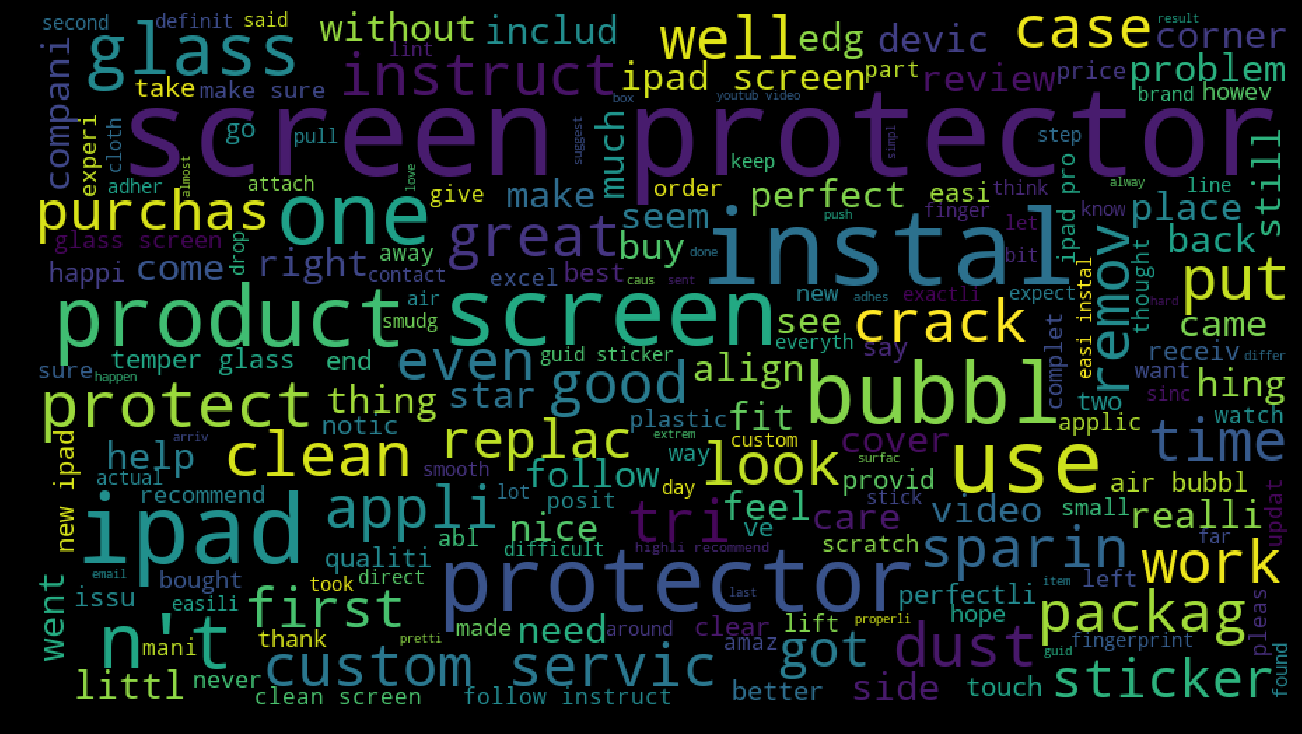

<Figure size 432x288 with 0 Axes>

In [17]:
plot_Cloud(pos_wordcloud)

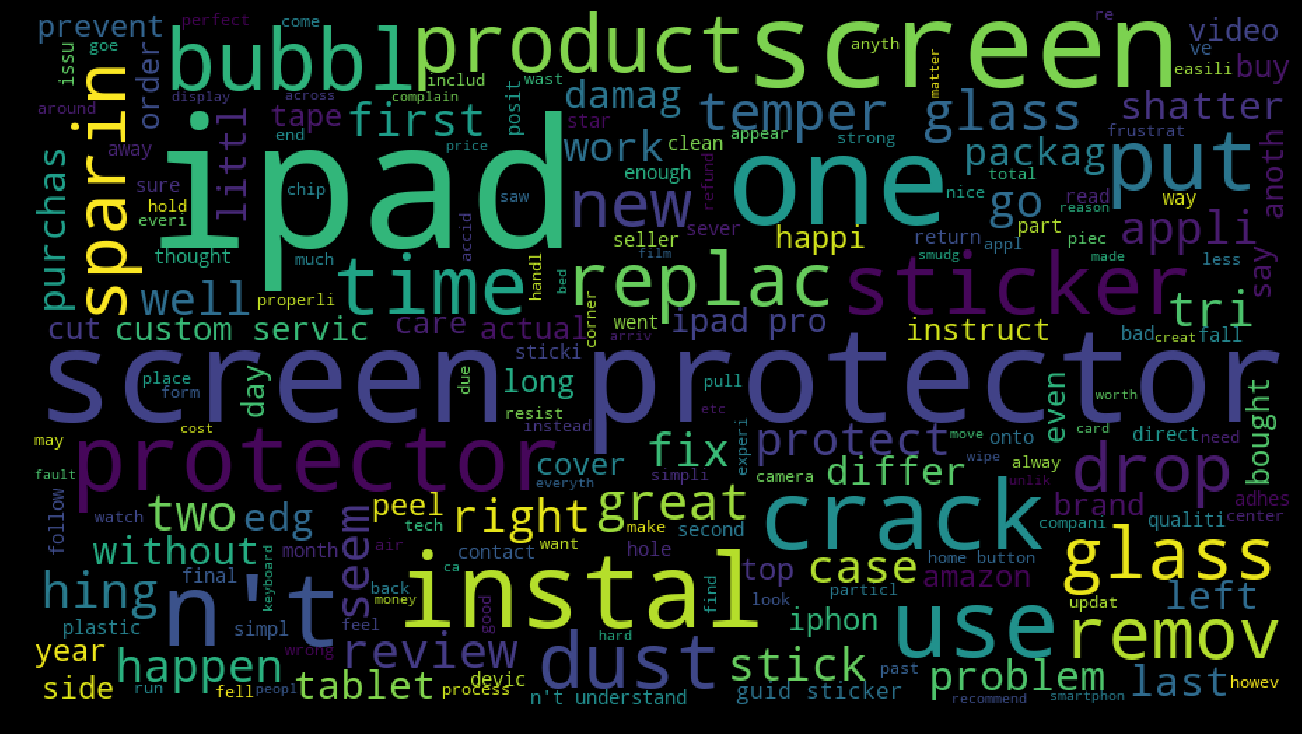

<Figure size 432x288 with 0 Axes>

In [18]:
plot_Cloud(neg_wordcloud)

In [ ]:
#SENTIMENT DISTRIBUTION ACROSS EACH PRODUCT ALONG WITH THEIR NAMES MAPPED FROM PRODUCT DATABASE

In [20]:
Sentimemt_Score_Product=Selected_Rows[['Sentiment_Score']]

In [21]:
Sentimemt_Score_Product=Sentimemt_Score_Product.groupby(['Sentiment_Score']).size().reset_index()

In [22]:
# Creating a new column with value of 'Sentimemt_Score_Product[0]' so that it is accessible with the index name.
Sentimemt_Score_Product['Count']=Sentimemt_Score_Product[0]

# Taking the Required columns only.
Sentimemt_Score_Product=Sentimemt_Score_Product[['Sentiment_Score','Count']]

In [24]:
x1=Sentimemt_Score_Product.head()

In [25]:
x1

,Sentiment_Score,Count
0,neg,31
1,neu,55
2,pos,315


In [28]:
Percentage=x1.groupby('Sentiment_Score')['Count'].sum().reset_index()

In [29]:
Percentage['Percentage']=(Percentage.Count/Percentage.Count.sum())*100

In [30]:
Percentage.head()

,Sentiment_Score,Count,Percentage
0,neg,31,7.730673
1,neu,55,13.715711
2,pos,315,78.553616


In [31]:
#DISTRIBUTION OF AVERAGE RATINGS WRITTEN BY USERS

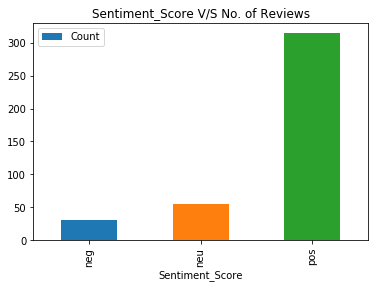

In [33]:
x1.plot(x="Sentiment_Score",y="Count",kind="bar",title="Sentiment_Score V/S No. of Reviews")
plt.show()